# Data loading

In [54]:
#Loading libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, minmax_scale, StandardScaler, Normalizer
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
import matplotlib.pyplot as plt
from scipy.stats import itemfreq
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer


In [55]:
#from sklearn.model_selection import train_test_split

%matplotlib inline
import datetime
from datetime import date, timedelta
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
#import keras
import sys
#from keras.layers.core import Dense, Dropout, Activation
#from keras.models import Sequential
#from keras.layers.core import Dense, Dropout, Activation
#import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder 
labelencoder= LabelEncoder()

In [56]:
#data loading

dtypes = {'store_nbr' : np.dtype('int64'), 
          'item_nbr' : np.dtype('int64'),
          'unit_sales' : np.dtype('float64'), 
          'onpromotion' : np.dtype('int64')}
stores = pd.read_csv("C:/Users/pvidhi/Downloads/dataset/stores.csv")
sales = pd.read_csv("C:/Users/pvidhi/Downloads/dataset/train.csv", dtype=dtypes)
test = pd.read_csv("C:/Users/pvidhi/Downloads/dataset/test.csv", dtype=dtypes)
#items = pd.read_csv("C:/Users/pvidhi/Downloads/dataset/train.csv")
trans = pd.read_csv("C:/Users/pvidhi/Downloads/dataset/transactions.csv")
holidays = pd.read_csv("C:/Users/pvidhi/Downloads/dataset/holidays_events.csv")


In [57]:
testd = pd.read_csv("C:/Users/pvidhi/Downloads/dataset/test.csv")
testd["familyn"] = labelencoder.fit_transform(testd["family"])
testdn = testd[["store_nbr", "familyn", "onpromotion"]]

In [58]:
#sampling data

date_mask =(sales["date"] >= "2017-07-1") 
date_mask =(sales["date"] <= "2018-07-1")
#date_mask =(sales["date"] >= "2017-07-1") & (sales["date"] <= "2017-08-1")

Salesdf = sales[date_mask]



In [59]:
#print size
len(Salesdf.shape)

2

In [60]:
#print size
Salesdf.shape

(699303, 6)

In [61]:
#load data
oil = pd.read_csv("C:/Users/pvidhi/Downloads/dataset/oil.csv")

In [62]:
#add missing date

min_oil_date = min(Salesdf.date)
max_oil_date = max(Salesdf.date)

calendar = []

#start date
d1 = datetime.datetime.strptime(min_oil_date, "%d-%m-%Y") 
#end date
d2 = datetime.datetime.strptime(max_oil_date, "%d-%m-%Y") 

delta = d2-d1
for i in range(delta.days + 1):
    calendar.append(datetime.date.strftime(d1 + timedelta(days=i), "%d-%m-%Y"))
    
calendar = pd.DataFrame({"date" : calendar})
    
oil = calendar.merge(oil, left_on = "date", right_on = "date", how="left")
    

In [63]:
oil.head()

,date,dcoilwtico
0,01-01-2013,NaN
1,02-01-2013,93.14
2,03-01-2013,92.97
3,04-01-2013,93.12
4,05-01-2013,NaN


In [64]:
print("Type: " , "\n", oil.dtypes)

Type:  
 date           object
dcoilwtico    float64
dtype: object


In [65]:
#check for NA
print(oil.isnull().sum(), '\n')
oil.head(5)

date            0
dcoilwtico    108
dtype: int64 



,date,dcoilwtico
0,01-01-2013,NaN
1,02-01-2013,93.14
2,03-01-2013,92.97
3,04-01-2013,93.12
4,05-01-2013,NaN


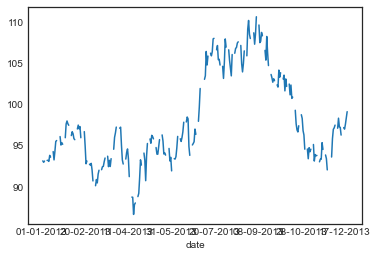

In [66]:
#plot oil values

oil_plot = oil["dcoilwtico"].copy()
oil_plot.index = oil["date"].copy()
oil_plot.plot()

plt.show()


# Data blending

In [67]:
#Merge train
Salesdf = Salesdf.drop('id', axis = 1)
Salesdf = Salesdf.merge(stores, left_on ="store_nbr", right_on="store_nbr", how="left")
#Salesdf = Salesdf.merge(sales, left_on ="family", right_on="family", how="left")
Salesdf = Salesdf.merge(holidays, left_on ="date", right_on="date", how="left")
Salesdf = Salesdf.merge(oil, left_on ="date", right_on="date", how="left")
Salesdf = Salesdf.drop(["description", "state"], axis = 1)

In [68]:
Salesdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 704649 entries, 0 to 704648
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   date         704649 non-null  object 
 1   store_nbr    704649 non-null  int64  
 2   family       704649 non-null  object 
 3   sales        704649 non-null  float64
 4   onpromotion  704649 non-null  int64  
 5   city         704649 non-null  object 
 6   type_x       704649 non-null  object 
 7   cluster      704649 non-null  int64  
 8   type_y       101574 non-null  object 
 9   locale       101574 non-null  object 
 10  locale_name  101574 non-null  object 
 11  transferred  101574 non-null  object 
 12  dcoilwtico   301158 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 75.3+ MB


In [69]:
Salesdf.isnull().sum().sort_values(ascending=False)

type_y         603075
locale         603075
locale_name    603075
transferred    603075
dcoilwtico     403491
date                0
store_nbr           0
family              0
sales               0
onpromotion         0
city                0
type_x              0
cluster             0
dtype: int64

In [70]:
#Shape
print("Shape:", Salesdf.shape, '\n')
print("Type:", "\n", Salesdf.dtypes)
Salesdf.describe()

Shape: (704649, 13) 

Type: 
 date            object
store_nbr        int64
family          object
sales          float64
onpromotion      int64
city            object
type_x          object
cluster          int64
type_y          object
locale          object
locale_name     object
transferred     object
dcoilwtico     float64
dtype: object


,store_nbr,sales,onpromotion,cluster,dcoilwtico
count,704649.000000,704649.000000,704649.000000,704649.000000,301158.000000
mean,27.488924,248.885793,7.246981,8.482368,98.105503
std,15.583253,825.104301,41.989069,4.650005,5.609272
min,1.000000,0.000000,0.000000,1.000000,86.650000
25%,14.000000,0.000000,0.000000,4.000000,93.710000
50%,27.000000,1.000000,0.000000,9.000000,96.290000
75%,41.000000,121.000000,0.000000,13.000000,103.080000
max,54.000000,46271.000000,639.000000,17.000000,110.620000


In [71]:
Salesdf.sample(15)

,date,store_nbr,family,sales,onpromotion,city,type_x,cluster,type_y,locale,locale_name,transferred,dcoilwtico
675475,17-07-2014,11,SCHOOL AND OFFICE SUPPLIES,4.0,3,Cayambe,B,6,NaN,NaN,NaN,NaN,NaN
564241,15-04-2014,40,CLEANING,1017.0,159,Machala,C,3,NaN,NaN,NaN,NaN,NaN
333784,06-10-2013,24,"LIQUOR,WINE,BEER",0.0,0,Guayaquil,D,1,NaN,NaN,NaN,NaN,NaN
207045,16-06-2013,19,BEVERAGES,997.0,0,Guaranda,C,15,NaN,NaN,NaN,NaN,NaN
594835,12-05-2014,49,EGGS,388.0,28,Quito,A,11,Holiday,Local,Puyo,False,NaN
125767,11-04-2013,38,BOOKS,0.0,0,Loja,D,4,NaN,NaN,NaN,NaN,93.44
44494,05-02-2013,8,EGGS,255.0,0,Quito,D,8,NaN,NaN,NaN,NaN,96.68
4542,03-01-2013,36,LINGERIE,0.0,0,Libertad,E,10,NaN,NaN,NaN,NaN,92.97
690640,05-08-2014,37,HOME AND KITCHEN II,0.0,0,Cuenca,D,2,Holiday,Local,Esmeraldas,False,NaN
530949,16-03-2014,7,GROCERY I,3918.0,0,Quito,D,8,NaN,NaN,NaN,NaN,NaN


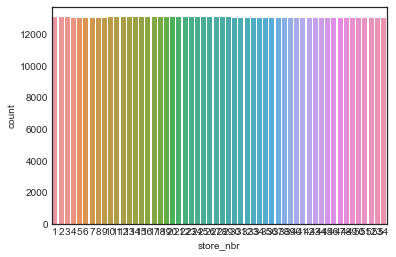

In [72]:
sns.countplot(x="store_nbr", data=Salesdf);

In [73]:
Salesdf.family.unique

<bound method Series.unique of 0                         AUTOMOTIVE
1                          BABY CARE
2                             BEAUTY
3                          BEVERAGES
4                              BOOKS
                     ...            
704644                       POULTRY
704645                PREPARED FOODS
704646                       PRODUCE
704647    SCHOOL AND OFFICE SUPPLIES
704648                       SEAFOOD
Name: family, Length: 704649, dtype: object>

In [74]:
x = itemfreq(Salesdf.family)
x = x[x[:,1].argsort()[::-1]]
x

C:\Users\pvidhi\AppData\Local\Temp/ipykernel_14644/1532840868.py:1: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  x = itemfreq(Salesdf.family)


array([['SEAFOOD', 21353],
       ['HOME AND KITCHEN I', 21353],
       ['BABY CARE', 21353],
       ['BEAUTY', 21353],
       ['BEVERAGES', 21353],
       ['BOOKS', 21353],
       ['BREAD/BAKERY', 21353],
       ['CELEBRATION', 21353],
       ['CLEANING', 21353],
       ['DAIRY', 21353],
       ['DELI', 21353],
       ['EGGS', 21353],
       ['FROZEN FOODS', 21353],
       ['GROCERY I', 21353],
       ['GROCERY II', 21353],
       ['HARDWARE', 21353],
       ['HOME AND KITCHEN II', 21353],
       ['SCHOOL AND OFFICE SUPPLIES', 21353],
       ['HOME APPLIANCES', 21353],
       ['HOME CARE', 21353],
       ['LADIESWEAR', 21353],
       ['LAWN AND GARDEN', 21353],
       ['LINGERIE', 21353],
       ['LIQUOR,WINE,BEER', 21353],
       ['MAGAZINES', 21353],
       ['MEATS', 21353],
       ['PERSONAL CARE', 21353],
       ['PET SUPPLIES', 21353],
       ['PLAYERS AND ELECTRONICS', 21353],
       ['POULTRY', 21353],
       ['PREPARED FOODS', 21353],
       ['PRODUCE', 21353],
       ['AUTOMO

In [75]:
x[:,0][0:50]

array(['SEAFOOD', 'HOME AND KITCHEN I', 'BABY CARE', 'BEAUTY',
       'BEVERAGES', 'BOOKS', 'BREAD/BAKERY', 'CELEBRATION', 'CLEANING',
       'DAIRY', 'DELI', 'EGGS', 'FROZEN FOODS', 'GROCERY I', 'GROCERY II',
       'HARDWARE', 'HOME AND KITCHEN II', 'SCHOOL AND OFFICE SUPPLIES',
       'HOME APPLIANCES', 'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN',
       'LINGERIE', 'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS',
       'PERSONAL CARE', 'PET SUPPLIES', 'PLAYERS AND ELECTRONICS',
       'POULTRY', 'PREPARED FOODS', 'PRODUCE', 'AUTOMOTIVE'], dtype=object)

In [76]:
s =Salesdf.family.values
s


array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', ..., 'PRODUCE',
       'SCHOOL AND OFFICE SUPPLIES', 'SEAFOOD'], dtype=object)

In [77]:
t=s.reshape(s.shape[0],1)
t

array([['AUTOMOTIVE'],
       ['BABY CARE'],
       ['BEAUTY'],
       ...,
       ['PRODUCE'],
       ['SCHOOL AND OFFICE SUPPLIES'],
       ['SEAFOOD']], dtype=object)

In [78]:
t1=np.where(t==x)
t1

C:\Users\pvidhi\AppData\Local\Temp/ipykernel_14644/199293911.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  t1=np.where(t==x)


(array([], dtype=int64),)

In [79]:
def N_most_labels(data, variable , N , all='TRUE'):
    labels_freq_pd = itemfreq(data[variable])
    labels_freq_pd = labels_freq_pd[labels_freq_pd[:, 1].argsort()[::-1]] #[::-1] ==> to sort in descending order
    
    if all == 'FALSE':
        main_labels = labels_freq_pd[:,0][0:N]
    else: 
        main_labels = labels_freq_pd[:,0][:]
        
    labels_raw_np = data[variable].values #transform in numpy
    labels_raw_np = labels_raw_np.reshape(labels_raw_np.shape[0],1)

    labels_filtered_index = np.where(labels_raw_np == main_labels)
    
    return labels_freq_pd, labels_filtered_index

label_freq, labels_filtered_index = N_most_labels(data = Salesdf, variable = "family", N = 20, all='FALSE')
print("labels_filtered_index[0].shape = ", labels_filtered_index[0].shape)

Salesdf_filtered = Salesdf.loc[labels_filtered_index[0],:]

C:\Users\pvidhi\AppData\Local\Temp/ipykernel_14644/3898913591.py:2: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  labels_freq_pd = itemfreq(data[variable])


labels_filtered_index[0].shape =  (427060,)


In [80]:
label_freq[0:10]


array([['SEAFOOD', 21353],
       ['HOME AND KITCHEN I', 21353],
       ['BABY CARE', 21353],
       ['BEAUTY', 21353],
       ['BEVERAGES', 21353],
       ['BOOKS', 21353],
       ['BREAD/BAKERY', 21353],
       ['CELEBRATION', 21353],
       ['CLEANING', 21353],
       ['DAIRY', 21353]], dtype=object)

In [81]:
    Salesdf_filtered.sample(10)

,date,store_nbr,family,sales,onpromotion,city,type_x,cluster,type_y,locale,locale_name,transferred,dcoilwtico
135417,16-04-2013,9,HOME CARE,0.000,0,Quito,B,6,NaN,NaN,NaN,NaN,88.73
341696,10-10-2013,46,HARDWARE,3.000,0,Quito,A,14,NaN,NaN,NaN,NaN,103.08
409869,09-12-2013,1,DELI,135.815,0,Quito,D,13,NaN,NaN,NaN,NaN,97.10
401791,04-12-2013,32,HOME AND KITCHEN II,0.000,0,Guayaquil,C,3,NaN,NaN,NaN,NaN,96.97
592854,11-05-2014,43,DELI,241.000,44,Esmeraldas,E,10,Event,National,Ecuador,False,NaN
263487,06-08-2013,51,HOME AND KITCHEN I,0.000,0,Guayaquil,A,17,NaN,NaN,NaN,NaN,105.32
362079,02-11-2013,19,BEVERAGES,1909.000,0,Guaranda,C,15,Holiday,National,Ecuador,False,NaN
305287,10-09-2013,25,BOOKS,0.000,0,Salinas,D,1,NaN,NaN,NaN,NaN,107.48
639547,17-06-2014,53,CLEANING,481.000,165,Manta,D,13,NaN,NaN,NaN,NaN,NaN
301966,08-09-2013,31,HOME AND KITCHEN II,0.000,0,Babahoyo,B,10,NaN,NaN,NaN,NaN,NaN


In [82]:
#Fill if no holiday by the value : "no_holiday"
na_index_Salesdf = Salesdf_filtered[Salesdf_filtered['type_y'].isnull() == True].index.values
print("Size of na_index_Salesdf : ", len(na_index_Salesdf), '\n')

Salesdf_filtered.loc[Salesdf_filtered['type_y'].isnull(), 'type_y'] = "no_holiday"
Salesdf_filtered.loc[Salesdf_filtered['locale'].isnull(), 'locale'] = "no_locale"
Salesdf_filtered.loc[Salesdf_filtered['transferred'].isnull(), 'transferred'] = "no_holiday"
    
#check NA
Salesdf_filtered.isnull().sum()

Size of na_index_Salesdf :  365500 



date                0
store_nbr           0
family              0
sales               0
onpromotion         0
city                0
type_x              0
cluster             0
type_y              0
locale              0
locale_name    365500
transferred         0
dcoilwtico     244540
dtype: int64

# Exploratory Data Analysis

<AxesSubplot:xlabel='type_x', ylabel='sales'>

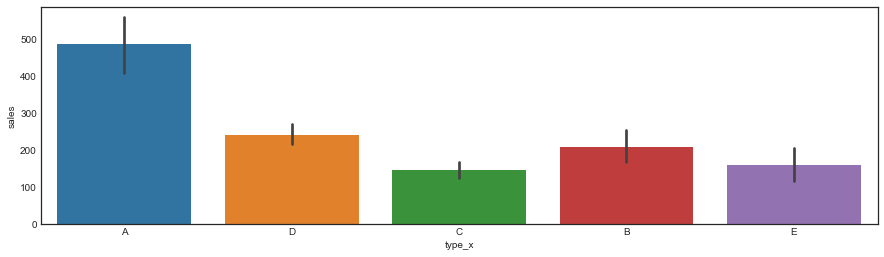

In [83]:
#plotting sales per store type
fig, (axis1)=plt.subplots(1,1,figsize=(15,4))
strain=Salesdf.sample(frac=0.01, replace=True)
sns.barplot(x="type_x", y="sales", data=strain, ax=axis1)

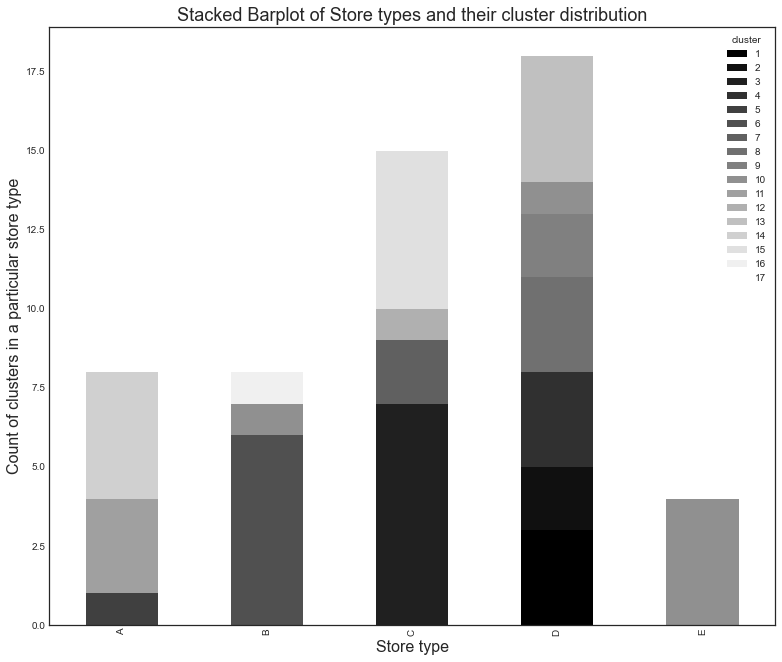

In [84]:
##cluster distribution across the store types

# Stacked Barplots of Types against clusters
plt.style.use('seaborn-white')
type_cluster = stores.groupby(['type','cluster']).size()
type_cluster.unstack().plot(kind='bar',stacked=True, colormap= 'gray', figsize=(13,11),  grid=False)
plt.title('Stacked Barplot of Store types and their cluster distribution', fontsize=18)
plt.ylabel('Count of clusters in a particular store type', fontsize=16)
plt.xlabel('Store type', fontsize=16)
plt.show()

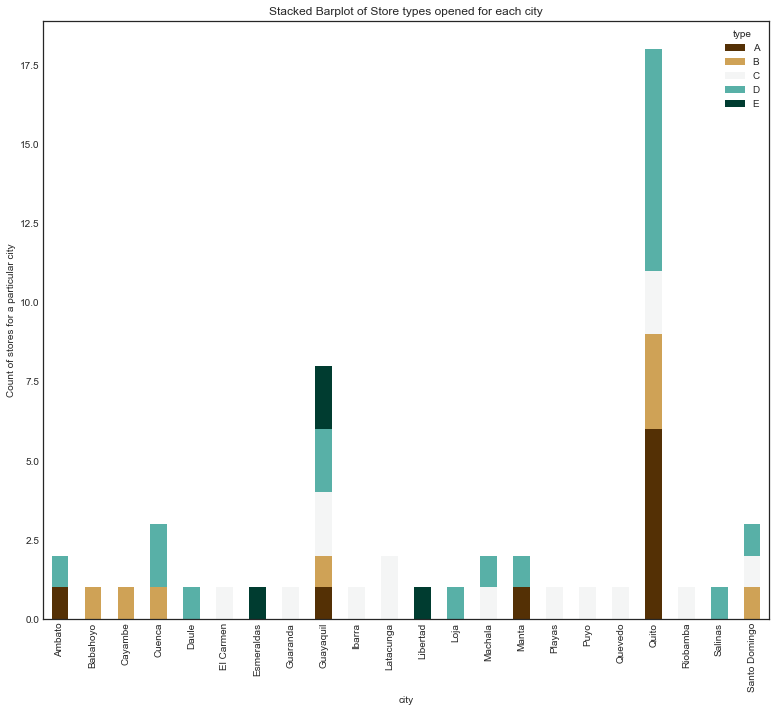

In [85]:
#store types opened for each day

# Stacked barplot of types of stores across the different cities
plt.style.use('seaborn-white')
city_cluster = stores.groupby(['city','type']).store_nbr.size()
city_cluster.unstack().plot(kind='bar',stacked=True, colormap= 'BrBG', figsize=(13,11),  grid=False)
plt.title('Stacked Barplot of Store types opened for each city')
plt.ylabel('Count of stores for a particular city')
plt.show()

<AxesSubplot:xlabel='city', ylabel='count'>

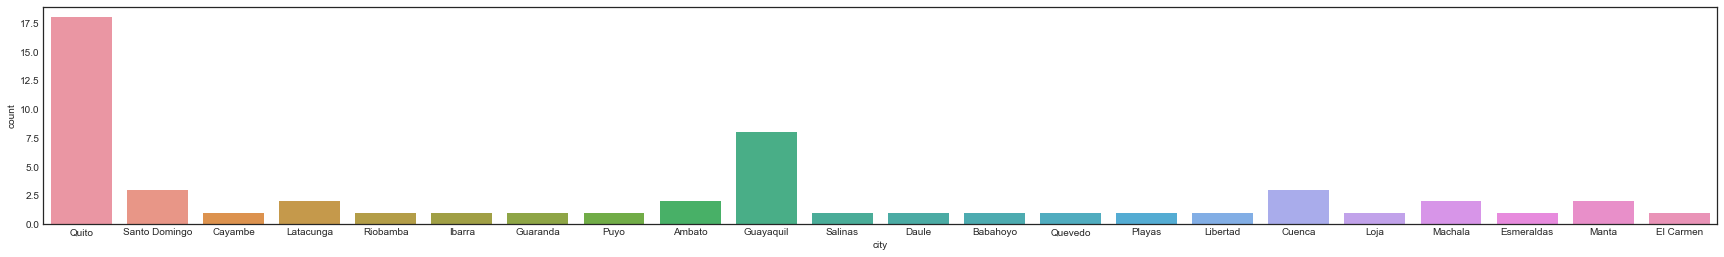

In [86]:
#plotting stores in cities
fig, (axis1)=plt.subplots(1,1,figsize=(30,4))
#strain=Salesdf.sample(frac=0.01, replace=True)
sns.countplot(x=stores["city"], data=stores, ax=axis1)

<AxesSubplot:xlabel='state', ylabel='count'>

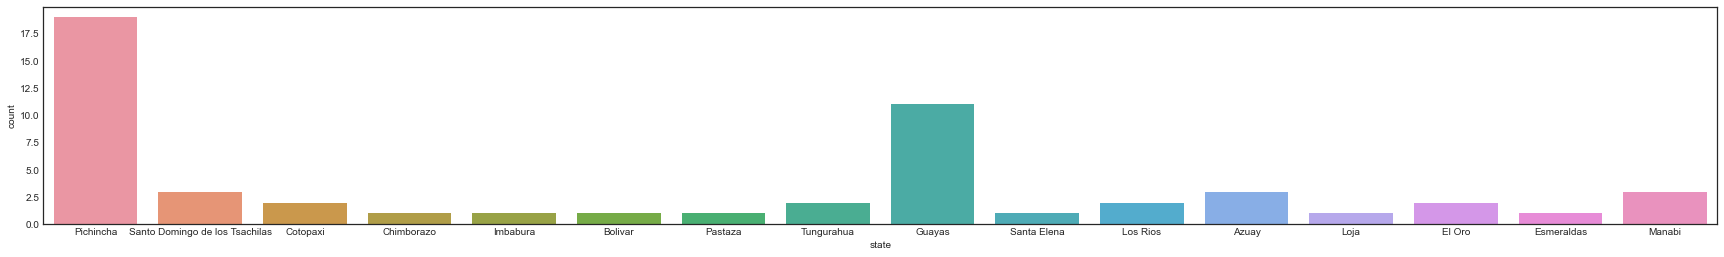

In [87]:
#stores in states
fig, (axis1)=plt.subplots(1,1,figsize=(30,4))
sns.countplot(x=stores["state"], data=stores, ax=axis1)

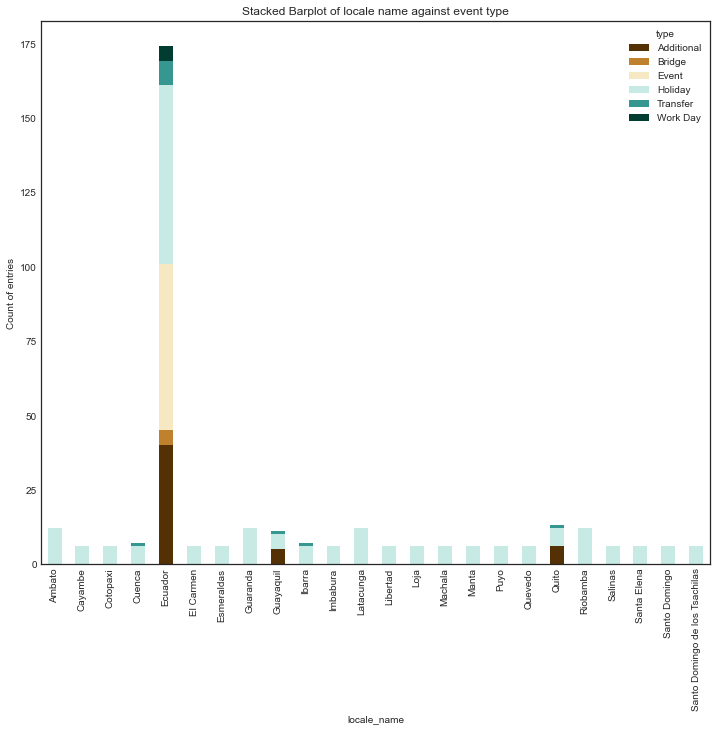

In [88]:
# Holiday Events data
plt.style.use('seaborn-white')
# plt.style.use('dark_background')
holiday_local_type = holidays.groupby(['locale_name', 'type']).size()
holiday_local_type.unstack().plot(kind='bar',stacked=True, colormap= 'BrBG', figsize=(12,10),  grid=False)
plt.title('Stacked Barplot of locale name against event type')
plt.ylabel('Count of entries')
plt.show()

<AxesSubplot:xlabel='family', ylabel='sales'>

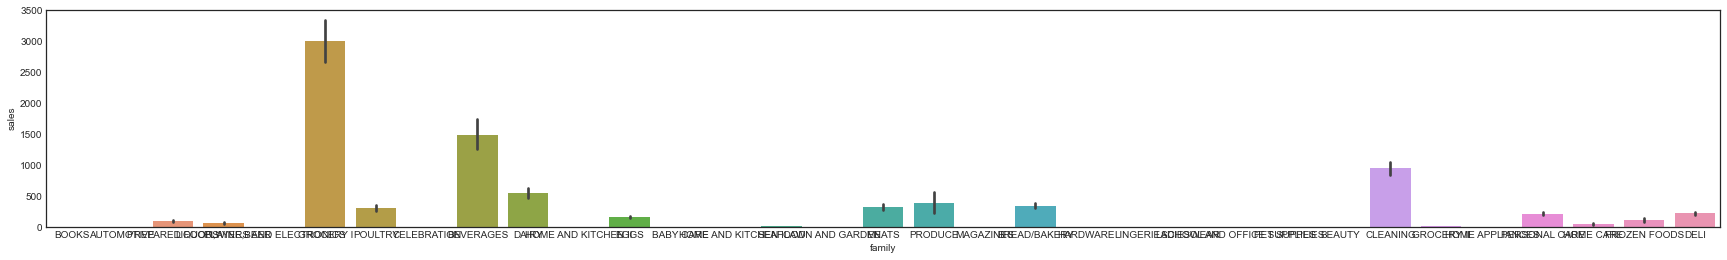

In [89]:
#plotting sales per product family
fig, (axis1)=plt.subplots(1,1,figsize=(30,4))
strain=Salesdf.sample(frac=0.01, replace=True)
sns.barplot(x="family", y="sales", data=strain, ax=axis1)

# Data transformation

In [90]:
## encoding using get_dummies on pandas dataframe.
dummy_variables = ['onpromotion', 'city','type_x','cluster','store_nbr', 'locale_name',
                'family','type_y', 'locale', 'transferred']

for var in dummy_variables:
    dummy = pd.get_dummies(Salesdf_filtered[var], prefix = var, drop_first = False)
    Salesdf_filtered = pd.concat([Salesdf_filtered, dummy], axis = 1)

Salesdf_filtered = Salesdf_filtered.drop(dummy_variables, axis = 1)
Salesdf_filtered = Salesdf_filtered.drop(['date'], axis = 1)

In [91]:
Salesdf_filtered.info()
#Salesdf_filtered.sample(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 427060 entries, 1 to 704648
Columns: 786 entries, sales to transferred_no_holiday
dtypes: float64(2), uint8(784)
memory usage: 329.1 MB


In [92]:
Salesdf_filtered.head()

,sales,dcoilwtico,onpromotion_0,onpromotion_1,onpromotion_2,onpromotion_3,onpromotion_4,onpromotion_5,onpromotion_6,onpromotion_7,...,type_y_Transfer,type_y_Work Day,type_y_no_holiday,locale_Local,locale_National,locale_Regional,locale_no_locale,transferred_False,transferred_True,transferred_no_holiday
1,0.0,NaN,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0.0,NaN,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0.0,NaN,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0.0,NaN,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
5,0.0,NaN,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [93]:
#dataframe contains data after the encoding technique
#re-scale the predicted unit_sales values
min_train, max_train = Salesdf_filtered['sales'].min(), Salesdf_filtered['sales'].max()

In [94]:
scalable_variables = ['sales','dcoilwtico']

for var in scalable_variables:
    mini, maxi = Salesdf_filtered[var].min(), Salesdf_filtered[var].max()
    Salesdf_filtered.loc[:,var] = (Salesdf_filtered[var] - mini) / (maxi - mini)

In [95]:
print('Shape : ', Salesdf_filtered.shape)
Salesdf_filtered.sample(10)

Shape :  (427060, 786)


,sales,dcoilwtico,onpromotion_0,onpromotion_1,onpromotion_2,onpromotion_3,onpromotion_4,onpromotion_5,onpromotion_6,onpromotion_7,...,type_y_Transfer,type_y_Work Day,type_y_no_holiday,locale_Local,locale_National,locale_Regional,locale_no_locale,transferred_False,transferred_True,transferred_no_holiday
590809,0.003090,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
209894,0.000000,0.467668,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
629259,0.000000,NaN,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
616903,0.000000,NaN,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
203694,0.000000,0.466416,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
424588,0.000000,0.431373,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
650326,0.000000,NaN,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
537025,0.000130,NaN,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
457489,0.006419,NaN,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
224464,0.000000,NaN,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1


In [96]:
print('Shape : ', Salesdf_filtered.shape)
Salesdf_filtered.sample(10)

Shape :  (427060, 786)


,sales,dcoilwtico,onpromotion_0,onpromotion_1,onpromotion_2,onpromotion_3,onpromotion_4,onpromotion_5,onpromotion_6,onpromotion_7,...,type_y_Transfer,type_y_Work Day,type_y_no_holiday,locale_Local,locale_National,locale_Regional,locale_no_locale,transferred_False,transferred_True,transferred_no_holiday
210292,0.000000,0.492699,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
684104,0.000022,NaN,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
158416,0.000000,0.393826,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
513879,0.033714,NaN,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
354524,0.011370,0.586984,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
233443,0.000000,0.824364,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
27636,0.000000,0.318315,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
423771,0.000000,0.439299,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
182043,0.000000,NaN,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
258721,0.000000,NaN,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1


In [97]:
Salesdf_filtered.isnull().sum()

sales                          0
dcoilwtico                244540
onpromotion_0                  0
onpromotion_1                  0
onpromotion_2                  0
                           ...  
locale_Regional                0
locale_no_locale               0
transferred_False              0
transferred_True               0
transferred_no_holiday         0
Length: 786, dtype: int64

In [98]:
#train database without sales
Salesdf_filtered = Salesdf_filtered.reset_index(drop=True)  #we reset the index
y = Salesdf_filtered['sales']
X = Salesdf_filtered.drop(['sales'], axis = 1)


print('Shape X :', X.shape)
print('Shape y :', y.shape)

Shape X : (427060, 785)
Shape y : (427060,)


In [99]:
num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=num_test, random_state=15)
print('X_train shape :', X_train.shape)
print('y_train shape :', y_train.shape)
print('X_test shape :', X_test.shape)
print('y_test shape :', y_test.shape)

X_train shape : (341648, 785)
y_train shape : (341648,)
X_test shape : (85412, 785)
y_test shape : (85412,)


# XGBOOST

In [100]:
model=XGBRegressor(max_depth=5)

In [101]:
testdn

,store_nbr,familyn,onpromotion
0,1,0,20
1,1,1,1
2,1,2,8
3,1,3,560
4,1,4,1
...,...,...,...
28507,9,28,54
28508,9,29,10
28509,9,30,302
28510,9,31,15


In [102]:
sales

,id,date,store_nbr,family,sales,onpromotion
0,0,01-01-2013,1,AUTOMOTIVE,0.000,0
1,1,01-01-2013,1,BABY CARE,0.000,0
2,2,01-01-2013,1,BEAUTY,0.000,0
3,3,01-01-2013,1,BEVERAGES,0.000,0
4,4,01-01-2013,1,BOOKS,0.000,0
...,...,...,...,...,...,...
1048570,1048570,13-08-2014,3,POULTRY,974.098,39
1048571,1048571,13-08-2014,3,PREPARED FOODS,324.293,13
1048572,1048572,13-08-2014,3,PRODUCE,10.000,1
1048573,1048573,13-08-2014,3,SCHOOL AND OFFICE SUPPLIES,0.000,0


In [103]:
data=pd.read_csv("C:/Users/pvidhi/Downloads/dataset/train.csv")
data = data[data["sales"]< 30000]
data = data[data["date"]> '2015-07-01']

In [104]:
data.describe()

,id,store_nbr,sales,onpromotion
count,3.492720e+05,349272.000000,349272.000000,349272.000000
mean,5.321265e+05,27.500000,235.861774,6.560706
std,2.958007e+05,15.585806,767.397017,39.705973
min,3.564000e+04,1.000000,0.000000,0.000000
25%,2.655178e+05,14.000000,0.000000,0.000000
50%,5.310355e+05,27.500000,2.000000,0.000000
75%,7.965532e+05,41.000000,118.000000,0.000000
max,1.026431e+06,54.000000,21719.000000,637.000000


In [105]:
model.fit(X_train._get_numeric_data(),y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [106]:
print("model score: %.3f" %model.score(X_test, y_test))

model score: 0.880


In [107]:
test=pd.read_csv("C:/Users/pvidhi/Downloads/dataset/test.csv")

In [108]:
y_pred=model.predict(X_test)
prediction=[round(value) for value in y_pred]

In [109]:
print('R2 score using XG Boost= ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score using XG Boost= ',mean_squared_error(y_test, y_pred), '/ 0.0')

R2 score using XG Boost=  0.8799172104630242 / 1.0
MSE score using XG Boost=  5.757183140548391e-05 / 0.0


In [110]:
print(y_pred)


[ 0.00083788 -0.00052095  0.0016535  ...  0.00023325  0.00086784
 -0.00061495]


In [111]:
#sales and predicted price
df=pd.DataFrame({'Sales': y_pred})
df

,Sales
0,0.000838
1,-0.000521
2,0.001653
3,0.000080
4,-0.001419
...,...
85407,0.000807
85408,0.002747
85409,0.000233
85410,0.000868


In [127]:
#test= pd.read_csv('C:/Users/pvidhi/Downloads/dataset/test.csv')
df3 = pd.concat([df2, df], axis=1)
df3 = df3.reindex(df.index)
#df2=df2.drop(['onpromotion', 'store_nbr', 'date', 'family', 'sales'], axis=1)
df3

,id,Sales
0,3000888.0,0.000838
1,3000889.0,-0.000521
2,3000890.0,0.001653
3,3000891.0,0.000080
4,3000892.0,-0.001419
...,...,...
85407,NaN,0.000807
85408,NaN,0.002747
85409,NaN,0.000233
85410,NaN,0.000868


In [129]:
df4=df3.dropna()
print(df4)

              id     Sales
0      3000888.0  0.000838
1      3000889.0 -0.000521
2      3000890.0  0.001653
3      3000891.0  0.000080
4      3000892.0 -0.001419
...          ...       ...
28507  3029395.0  0.078792
28508  3029396.0  0.000192
28509  3029397.0  0.000479
28510  3029398.0  0.000056
28511  3029399.0 -0.000189

[28512 rows x 2 columns]


In [133]:
df4['id'] = df4["id"].astype("Int32")
df4

C:\Users\pvidhi\AppData\Local\Temp/ipykernel_14644/3416036309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['id'] = df4["id"].astype("Int32")


,id,Sales
0,3000888,0.000838
1,3000889,-0.000521
2,3000890,0.001653
3,3000891,0.000080
4,3000892,-0.001419
...,...,...
28507,3029395,0.078792
28508,3029396,0.000192
28509,3029397,0.000479
28510,3029398,0.000056


In [134]:
df4.to_csv('C:/Users/pvidhi/Downloads/submission11.csv', index=False)
